In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [7]:

# STARTING VARIABLES
ORBITS_PER_SIMULATION   = 1 # years
REVOLUTIONS_PER_ORBIT   = 30 # days
# REVOLUTIONS_PER_ORBIT   = 365 # days
ARCS_PER_REVOLUTION     = 24 # hours

# money to energy multiplier
mny2e = 10

# prep data collection for graph
# yearly data points
X_yrs = list()
Y_me_yr_mny_made = list()
Y_me_yr_mny_spent = list()
Y_me_yr_e_consumed = list()
Y_me_yr_e_expended = list()
Y_me_yr_e_production = list()
Y_me_yr_mny_val_of_e_produced = list()

# Y_world_yr_mny_made = list()
# Y_world_yr_mny_spent = list()
# Y_world_yr_e_consumed = list()
# Y_world_yr_e_expended = list()

# monthly data points
# X_mos = list()
# Y_me_mo_mny_made = list()
# Y_me_mo_mny_spent = list()
# Y_me_mo_e_consumed = list()
# Y_me_mo_e_expended = list()
# Y_me_mo_mny_val_of_e_produced = list()

# Y_world_mo_mny_made = list()
# Y_world_mo_mny_spent = list()
# Y_world_mo_e_consumed = list()
# Y_world_mo_e_expended = list()

# daily data points
X_days = list()
money_made = list()
money_spent = list()
e_consumed = list()
e_expended = list()
expended_vs_consumed = list()
e_production = list()
val_of_e_produced = list()

# Y_world_day_mny_made = list()
# Y_world_day_mny_spent = list()
# Y_world_day_e_consumed = list()
# Y_world_day_e_expended = list()

In [8]:

class Agent:
    energy  = 100
    money   = 100
    energy_produced = 0

    def __init__(self):
        pass


class Me(Agent):

    def __init__(self):
        super().__init__()

    def buy(self, damage):
        self.money -= damage
        return damage

    def consume(self, damage):
        e = (damage * mny2e)
        self.energy += e
        return e

    def expend(self):
        hourly_expenditure = 5
        self.energy -= hourly_expenditure
        return hourly_expenditure

    def mine(self):
        expend = self.expend() # expend energy
        e_produced = 500

        return_tpl = (expend, e_produced)
        return return_tpl

    def earn(self, amt):
        self.money += amt
        return amt


# class World(Agent):
#
#     def __init__(self):
#         super().__init__()


me      = Me()
# world   = World()

In [9]:

# GAME LOOP
# orbits    -> revolutions  -> arcs
# years     -> days         -> hours
earnings = 0
spend = 0
consumption = 0
expenditure = 0
exp_v_cons = 0
production = 0
production_val = 0

for standard_orbit in range(ORBITS_PER_SIMULATION):

    # X_yrs.append(standard_orbit)

    # yearly_earnings = 0
    # yearly_spend = 0
    # yearly_consumption = 0
    # yearly_expenditure = 0
    # yearly_production = 0
    for standard_revolution in range(REVOLUTIONS_PER_ORBIT):

        X_days.append(standard_revolution)

        daily_earnings = 0
        daily_spend = 0
        daily_consumption = 0
        daily_expenditure = 0
        daily_production = 0

        for standard_arc in range(ARCS_PER_REVOLUTION):

            # if getting hungry
            if me.energy <= 50:
                damage = 5 # basic value to pass to both functions
                # buy food
                spent = me.buy(damage)
                daily_spend += spent
                # eat the food
                consumed = me.consume(damage)
                daily_consumption += consumed
                # energy used to purchase and then eat
                expended = me.expend()
                daily_expenditure += expended

            else:
                # or work and get money
                expended, produced = me.mine() # mine more energy
                daily_expenditure += expended
                daily_production += produced
                earned = me.earn(5) # money earned
                daily_earnings += earned

        daily_production_val = (mny2e*daily_production)

        earnings += daily_earnings
        spend += daily_spend
        consumption += daily_consumption
        expenditure += daily_expenditure
        exp_v_cons += (daily_expenditure-daily_consumption)
        production += daily_production
        production_val += daily_production_val

        money_made.append(earnings)
        money_spent.append(spend)
        e_consumed.append(consumption)
        e_expended.append(expenditure)
        expended_vs_consumed.append(exp_v_cons)
        e_production.append(production)
        val_of_e_produced.append(production_val)
        #
        # money_made.append(daily_earnings)
        # money_spent.append(daily_spend)
        # e_consumed.append(daily_consumption)
        # e_expended.append(daily_expenditure)
        # e_production.append(daily_production)
        # val_of_e_produced.append(daily_production_val)

    # yearly_production_val = (mny2e*yearly_production)
    #
    # Y_me_yr_mny_made.append(yearly_earnings)
    # Y_me_yr_mny_spent.append(yearly_spend)
    # Y_me_yr_e_consumed.append(yearly_consumption)
    # Y_me_yr_e_expended.append(yearly_expenditure)
    # Y_me_yr_e_production.append(yearly_production)
    # Y_me_yr_mny_val_of_e_produced.append((mny2e*yearly_production))

In [10]:

# Y_me_years = [money_made,
#               money_spent,
#               e_consumed,
#               e_expended,
#               e_production,
#               val_of_e_produced]

# Y_me_days = [ Y_me_yr_mny_made,
#               Y_me_yr_mny_spent,
#               Y_me_yr_e_consumed,
#               Y_me_yr_e_expended,
#               Y_me_yr_e_production,
#               Y_me_yr_mny_val_of_e_produced]

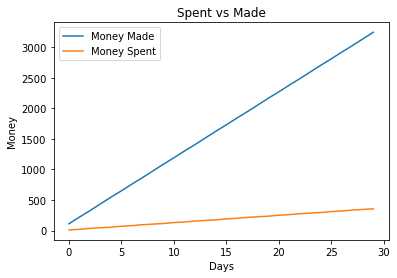

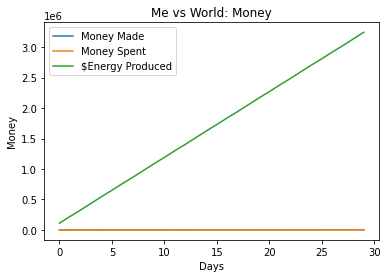

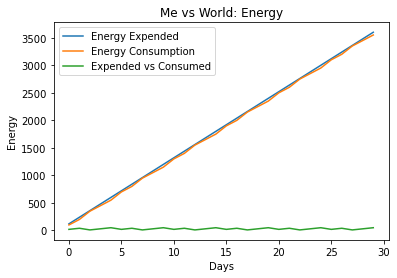

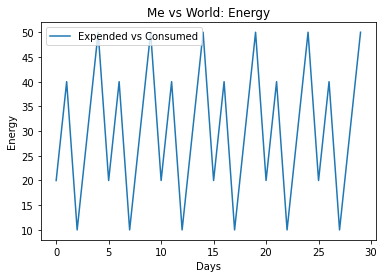

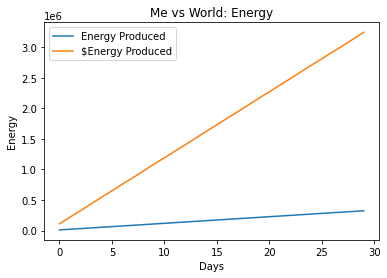

In [11]:
# cumulative values
fig_d, ax_d = plt.subplots()
ax_d.plot(X_days, money_made, label='Money Made')
ax_d.plot(X_days, money_spent, label='Money Spent')
# ax_d.plot(X_days, val_of_e_produced,   label='$Energy Produced')
ax_d.set_xlabel('Days')
ax_d.set_ylabel('Money')
ax_d.set_title("Spent vs Made")
ax_d.legend()


# cumulative values
fig_d, ax_d = plt.subplots()
ax_d.plot(X_days, money_made, label='Money Made')
ax_d.plot(X_days, money_spent, label='Money Spent')
ax_d.plot(X_days, val_of_e_produced, label='$Energy Produced')
ax_d.set_xlabel('Days')
ax_d.set_ylabel('Money')
ax_d.set_title("Me vs World: Money")
ax_d.legend()

# cumulative values
fig_a, ax_a = plt.subplots()
ax_a.plot(X_days, e_expended, label='Energy Expended')
ax_a.plot(X_days, e_consumed, label='Energy Consumption')
ax_a.plot(X_days, expended_vs_consumed, label='Expended vs Consumed')
# ax_a.plot(X_days, e_production,            label='Energy Produced')
# ax_a.plot(X_days, val_of_e_produced,   label='$Energy Produced')
ax_a.set_xlabel('Days')
ax_a.set_ylabel('Energy')
ax_a.set_title("Me vs World: Energy")
ax_a.legend()

# cumulative values
fig_a, ax_a = plt.subplots()
# ax_a.plot(X_days, e_expended,                              label='Energy Expended')
# ax_a.plot(X_days, e_consumed,                              label='Energy Consumption')
ax_a.plot(X_days, expended_vs_consumed, label='Expended vs Consumed')
# ax_a.plot(X_days, e_production,            label='Energy Produced')
# ax_a.plot(X_days, val_of_e_produced,   label='$Energy Produced')
ax_a.set_xlabel('Days')
ax_a.set_ylabel('Energy')
ax_a.set_title("Me vs World: Energy")
ax_a.legend()


# cumulative values
fig_a, ax_a = plt.subplots()
# ax_a.plot(X_days, e_consumed,                              label='Energy Consumption')
# ax_a.plot(X_days, e_expended,                              label='Energy Expended')
# ax_a.plot(X_days, expended_vs_consumed, label='Energy Consumption')
ax_a.plot(X_days, e_production, label='Energy Produced')
ax_a.plot(X_days, val_of_e_produced, label='$Energy Produced')
ax_a.set_xlabel('Days')
ax_a.set_ylabel('Energy')
ax_a.set_title("Me vs World: Energy")
ax_a.legend()

# daily energy graph
# fig_d, ax_d = plt.subplots()
# ax_d.plot(X_days, money_made,                label='Money Made')
# ax_d.plot(X_days, money_spent,               label='Money Spent')
# ax_d.plot(X_days, e_consumed,              label='Energy Consumption')
# ax_d.plot(X_days, e_expended,              label='Energy Expended')
# ax_d.plot(X_days, e_production,            label='Energy Produced')
# ax_d.plot(X_days, val_of_e_produced,   label='$Energy Produced')
# ax_d.set_xlabel('Days')
# ax_d.set_ylabel('Money / Energy')
# ax_d.set_title("Me vs World Simulation")
# ax_d.legend()

# yearly graph
# X_y = np.asarray(X_yrs)
# Y_y = np.asarray(Y_me_years)
# fig_y, ax_y = plt.subplots()
# ax_y.plot(X_y, Y_y, color='C1')

# fig_d.savefig("figure.pdf")
# fig_y.savefig("figure.pdf")
#
# fig_d.show()
# fig_d.show()
# fig_y.show()